In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/predictions030.tsv', sep="\t")
print(df)

    project_ids  sample_ids genders  doses  target  prediction  \
0     SRP161461  SRR7817611    male      0       0           0   
1     SRP161461  SRR7817612    male      0       0           0   
2     SRP161461  SRR7817614    male      0       0           0   
3     SRP161461  SRR7817615    male      0       0           0   
4     SRP161461  SRR7817616    male      0       0           0   
..          ...         ...     ...    ...     ...         ...   
215   SRP090688  SRR4317656    male     30       1           1   
216   SRP090688  SRR4317657    male     30       1           1   
217   SRP090688  SRR4317658    male     30       1           1   
218   SRP090688  SRR4317659    male     30       1           1   
219   SRP090688  SRR4317660    male     30       1           1   

     confidence_class_0  confidence_class_1  
0          9.999994e-01        5.647582e-07  
1          9.999985e-01        1.579895e-06  
2          9.999974e-01        2.605758e-06  
3          9.999993e-01

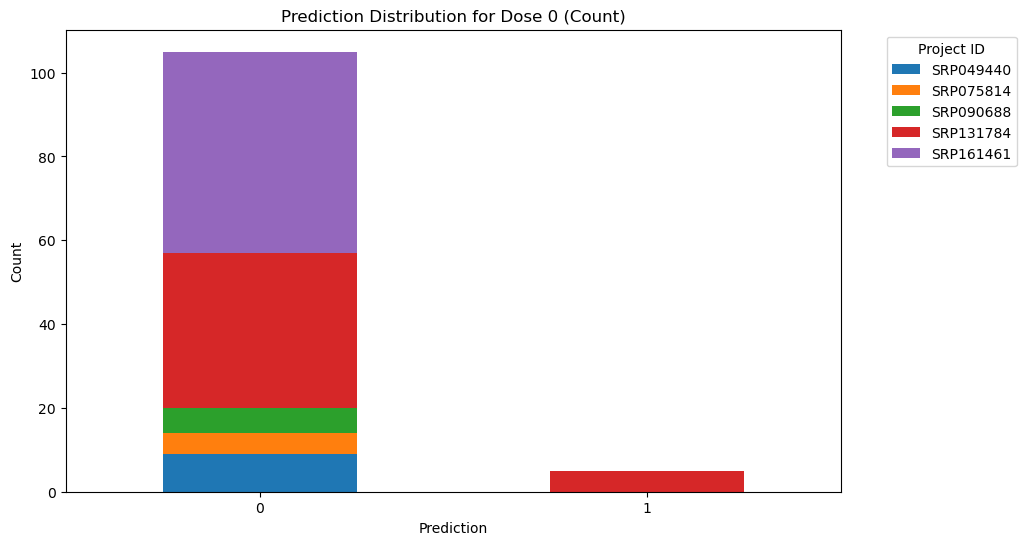

<Figure size 640x480 with 0 Axes>

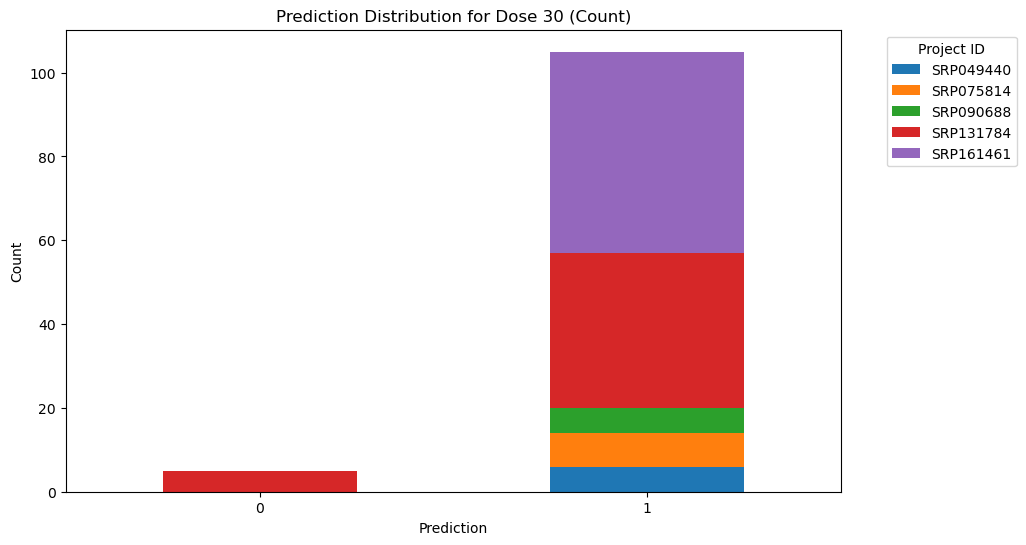

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt

for dose in df['doses'].unique():
    subset = df[df['doses'] == dose]
    prediction_counts = subset.groupby(['prediction', 'project_ids']).size().unstack(fill_value=0)
    
    ax = prediction_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    plt.title(f'Prediction Distribution for Dose {dose} (Count)')
    plt.xlabel('Prediction')
    plt.ylabel('Count')
    plt.legend(title='Project ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    
    plt.savefig(f'prediction_distribution_dose_{dose}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

    plt.clf()


In [4]:
ig_0 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/ig_0030.txt', header=None, sep="\t")
ig_1 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/ig_1030.txt', header=None, sep="\t")
edges = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/GEO_model_training/input/edgeLabels.csv', header=None, sep=" ")
result = pd.concat([ig_0, ig_1, edges], axis=1)
result.columns = ["ig_0", "ig_1", "start", "end"]
print(result)

          ig_0      ig_1          start            end
0     0.005057  0.004024  R-MMU-9613507  R-MMU-9613545
1     0.009448  0.009587  R-MMU-9613545  R-MMU-9613562
2     0.005760  0.004270  R-MMU-9613562  R-MMU-9613670
3     0.011182  0.008623  R-MMU-9639715  R-MMU-9640117
4     0.025815  0.022217  R-MMU-9641089  R-MMU-9641096
...        ...       ...            ...            ...
8551  0.025367  0.022891  R-MMU-8856808  R-MMU-8856813
8552  0.006535  0.003797  R-MMU-8868651  R-MMU-8868648
8553  0.040372  0.042630  R-MMU-8868648  R-MMU-8868661
8554  0.019762  0.018936  R-MMU-8868660  R-MMU-8868658
8555  0.006281  0.006372  R-MMU-8863721  R-MMU-8863723

[8556 rows x 4 columns]


In [5]:
import pandas as pd

sorted_by_ig0 = result.sort_values(by='ig_0', ascending=False)

sorted_by_ig1 = result.sort_values(by='ig_1', ascending=False)

sorted_by_ig0.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/sorted_by_ig0030.csv', sep='\t', index=False)
sorted_by_ig1.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/sorted_by_ig1030.csv', sep='\t',index=False)

